# Data analysis
Having a set of clean qualitative data is only one step, another step is analysing this data according to gain information or even knowledge. Therefore, we are going to take a look into **Pattern Analysis** and **Cluster Analysis**.

## Point Pattern Analysis
To be more precise, we focus on point pattern analysis.

A **pattern analysis** involves:
* Identification
* Quantification
* Visualization

It is important for identifying how geometric phenomena behave, and therefore can be seen as a comparison of pattern through statistical quantification.  
One can say it answers the question: *Is there a spatial clustering?*  

A **point pattern** can be seen as a collection of events, which take place in several locations. Analysing this spatial arrangements of points in a usually 2-dimensional space is called *point pattern analysis*. Therefore, the *space* is a predefined study region.  
A set of points, let us call them $X$, with $X = {x \in D}. D$ is therefore the study region and a subset of the $R^n$ (n-dimensional Euclidean space).  

But before being too theoretical, let us work this out by using an example:
### Point pattern file import
To provide a meaningful example, we will not use the example **Recyclinghöfe.json** but instead use **Haltestellen.csv**. The new example provides information about bus stops in Aachen and there are a lot of bus stops in Aachen. Our data source is the AVV. They provide information of their bus system. 

### Data preparation for point pattern analysis
Let us get started: First, we need to read the CSV file. As the table shows, there are just little information, however, imported for us are the coordinates' information. 

On first glimpse the coordinates' representation looks a little different, however, having a look at the README file provided by the AVV, one knows why the coordinates look like this, they are multiplied by 1000000. So, before using them, we need to divide all coordinate content by 1000000 to get the coordinate representation our pandas and GeoPandas methods and functions can work with.

In [1]:
import numpy
import pandas as pd
import geopandas
import pysal
import seaborn
import contextily
import os
import matplotlib.pyplot as plt 
avv_halt = pd.read_csv(r"./data/AVV_Haltestellen.csv", sep=',')
avv_halt.head()

,HSTNUMSYS,HSTNUM,HSTNAME,AGS,KOMMUNE,ORTSTEIL,WGS84_RW_X_1000000,WGS84_HW_X_1000000,GLOBAL_ID
0,AVV,1001,"Aachen, Bushof",5334002,Aachen,Aachen,6089768.0,50776453.0,de:05334:1001
1,AVV,1002,"Aachen, Kaiser-Friedrich-Park",5334002,Aachen,Aachen,6075421.0,50759141.0,de:05334:1002
2,AVV,1003,"Aachen, Ehrenmal / Lousberg",5334002,Aachen,Aachen,6083328.0,50782274.0,de:05334:1003
3,AVV,1004,"Aachen, STAWAG",5334002,Aachen,Aachen,6100047.0,50783114.0,de:05334:1004
4,AVV,1005,"Aachen, Misereor",5334002,Aachen,Aachen,6083912.0,50768538.0,de:05334:1005


Let us get all existing coordinate elements and divide the first column *WGS84_RW_X_1000000* than we do the second one *WGS84_HW_X_1000000*.  
To make it easier, one could implement a function instead, to keep it clean and simple. But in this example, we use the longer way to show you what will happen.

First, we Slice the DataFrame focusing on the *WGS84_RW_X_1000000* column. Next we create two empty lists called old and new. With this preparation we can iterate over the column *WGS84_RW_X_1000000*. We first append all elements to the list called old before we go ahead and divide the element by 1000000 and append the result to the list called new.

In [2]:
#First changing data from the first column
ort = avv_halt['WGS84_RW_X_1000000'] 
old = []
new = []
for elem in ort:
    old.append(elem)
    elem = elem / 1000000
    new.append(elem)

In a next step we are going to replace all old coordinate representations (we still have them in our list called old) with the new coordinate representation within the DataFrame.

If you compare both DataFrames, the one from above and the one we are just about to plot, you will see a change in column *WGS84_RW_X_1000000*.

In [3]:
avv_halt['WGS84_RW_X_1000000'].replace(old, new, inplace = True)
avv_halt.head()

,HSTNUMSYS,HSTNUM,HSTNAME,AGS,KOMMUNE,ORTSTEIL,WGS84_RW_X_1000000,WGS84_HW_X_1000000,GLOBAL_ID
0,AVV,1001,"Aachen, Bushof",5334002,Aachen,Aachen,6.089768,50776453.0,de:05334:1001
1,AVV,1002,"Aachen, Kaiser-Friedrich-Park",5334002,Aachen,Aachen,6.075421,50759141.0,de:05334:1002
2,AVV,1003,"Aachen, Ehrenmal / Lousberg",5334002,Aachen,Aachen,6.083328,50782274.0,de:05334:1003
3,AVV,1004,"Aachen, STAWAG",5334002,Aachen,Aachen,6.100047,50783114.0,de:05334:1004
4,AVV,1005,"Aachen, Misereor",5334002,Aachen,Aachen,6.083912,50768538.0,de:05334:1005


The same procedure happens for the other column *WGS84_HW_X_1000000* (at this point it would be wise to create for example a function to avoid duplication in the code).

In [4]:
#Second changing data from the second column
ort2 = avv_halt['WGS84_HW_X_1000000'] 
old2 = []
new2 = []
for elem2 in ort2:
    old2.append(elem2)
    elem2 = elem2 / 1000000
    new2.append(elem2)

In [5]:
avv_halt['WGS84_HW_X_1000000'].replace(old2, new2, inplace = True)
avv_halt.head()

,HSTNUMSYS,HSTNUM,HSTNAME,AGS,KOMMUNE,ORTSTEIL,WGS84_RW_X_1000000,WGS84_HW_X_1000000,GLOBAL_ID
0,AVV,1001,"Aachen, Bushof",5334002,Aachen,Aachen,6.089768,50.776453,de:05334:1001
1,AVV,1002,"Aachen, Kaiser-Friedrich-Park",5334002,Aachen,Aachen,6.075421,50.759141,de:05334:1002
2,AVV,1003,"Aachen, Ehrenmal / Lousberg",5334002,Aachen,Aachen,6.083328,50.782274,de:05334:1003
3,AVV,1004,"Aachen, STAWAG",5334002,Aachen,Aachen,6.100047,50.783114,de:05334:1004
4,AVV,1005,"Aachen, Misereor",5334002,Aachen,Aachen,6.083912,50.768538,de:05334:1005


Bit column names *WGS84_RW_X_1000000* and *WGS84_HW_X_1000000* are quite long, so in a next step, we change both, one to longitude and the other one to latitude, as they are not just shorter but also more intuitive.

**Hint**: Intuitive wording can be quite helpful when it comes to naming something, for example variables but also columns etc.

In [6]:
avv_halt = avv_halt.rename(columns = {'WGS84_HW_X_1000000' : 'latitude'})
avv_halt = avv_halt.rename(columns = {'WGS84_RW_X_1000000' : 'longitude'})
avv_halt.head()

,HSTNUMSYS,HSTNUM,HSTNAME,AGS,KOMMUNE,ORTSTEIL,longitude,latitude,GLOBAL_ID
0,AVV,1001,"Aachen, Bushof",5334002,Aachen,Aachen,6.089768,50.776453,de:05334:1001
1,AVV,1002,"Aachen, Kaiser-Friedrich-Park",5334002,Aachen,Aachen,6.075421,50.759141,de:05334:1002
2,AVV,1003,"Aachen, Ehrenmal / Lousberg",5334002,Aachen,Aachen,6.083328,50.782274,de:05334:1003
3,AVV,1004,"Aachen, STAWAG",5334002,Aachen,Aachen,6.100047,50.783114,de:05334:1004
4,AVV,1005,"Aachen, Misereor",5334002,Aachen,Aachen,6.083912,50.768538,de:05334:1005


In [7]:
avv_halt.to_csv('avv_stops.csv', index=False)

### Plotting graphs
We want to know if there actually is spatial clustering. To do this, we could first go ahead and plot out points in a dependent graph, just to see if there are any conspicuous features. And you can probably see for yourself, there are!
So, we use Seaborn here to plot our points in a dependent graph, where the points are ordered and the point dataset in general gets a dimension. 

The result is: One can see point concentration in different areas.

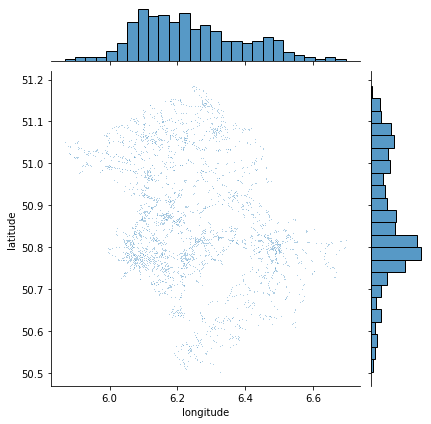

In [8]:
seaborn.jointplot(x='longitude', y='latitude', data=avv_halt, s=0.5);

## Cluster analysis
So far we only have a clue that there could be a spatial clustering, so we could move on from pattern analysis to cluster analysis. But first let us talk about the difference between a pattern and a cluster. Well, a pattern represents conspicuous features and/or designs. A cluster however, is more location focused, answering the questions: *Where are hot spots and cold spots?*, *Where are incidents most dense?*.

Keep this difference in mind when you consider performing pattern and cluster analysis.

## Hex-binning
In a next step, let us make the cluster structures more visible.

Binning is a technique for data aggregation, used for grouping data of a dataset. Therefore, the dataset of *n* values will be converted into less than *n* discrete groups. We just consider 2-dimensional (x, y coordinates) datasets. The technique is simple: A plane (x, y) is uniformly tiled in polygons, which can be squares, rectangles or hexagons.
Which means: Hex-binning is a specific way for creating choropleth maps. The main advantage of hexagons in comparison with rectangles is, that they are more similar to circles than squares, therefore the data aggregation around a bin centre is more efficient, when similar values provoke a lot of over plotting.

Let us take a look at an example:  

When many bus stops (points) are concentrated in some area, it can become hard to explore the patterns' nature (see the graph plot from above). To simplify and improve the visibility, one generate a regular grid (hexagonal). Depending on how many points fall in one grid cell, the colour is chosen. 

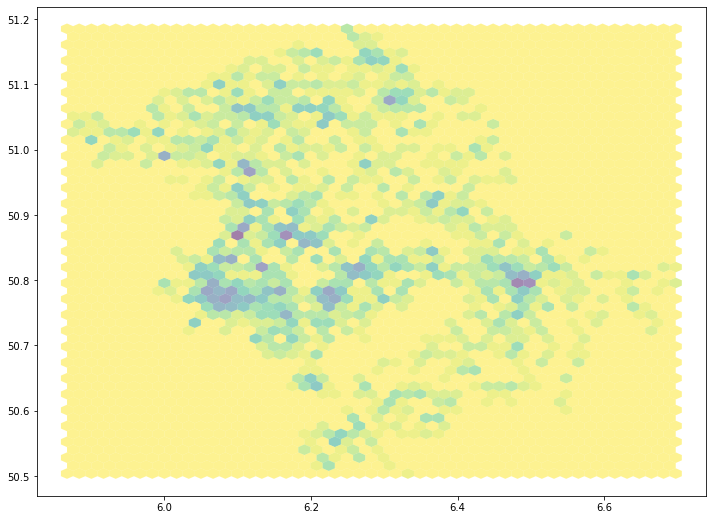

In [9]:
f, ax = plt.subplots(1, figsize=(12, 9))
#Generating the hexbin plot
hb = ax.hexbin(
    avv_halt['longitude'],
    avv_halt['latitude'], 
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)

Much nicer and much more recognizable for the human eye. Additionally, to the plotted graph, we can add a *basemap* to add a geografic lication.

Next, we use the library *contextily*, because one can use the **add_basemap()** method to add a base map to provide a context. 

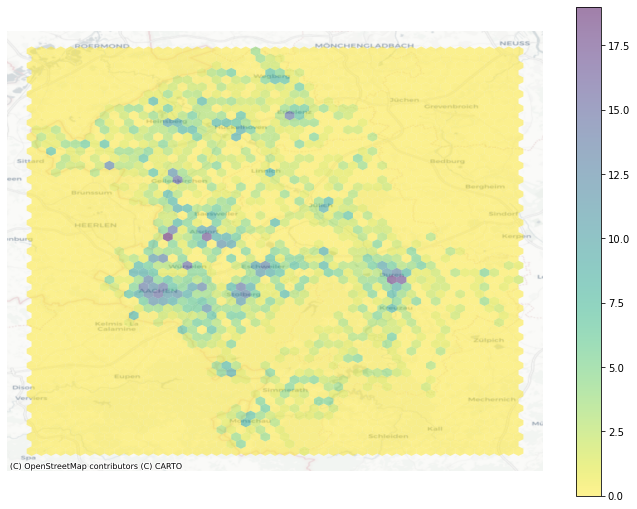

In [10]:
f, ax = plt.subplots(1, figsize=(12, 9))
#Generating the hexbin plot
hb = ax.hexbin(
    avv_halt['longitude'],
    avv_halt['latitude'], 
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
#Adding a basemap
contextily.add_basemap(
    ax, 
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron
)
plt.colorbar(hb)
ax.set_axis_off()

## Kernel density estimation (KDE)
Almost at the end! The final method for cluster representation we want to show you is the **Kernal Density Estimation**. 

The grids are the spatial equivalent of a histogram. An alternative is the Kernel Density Estimation (an empirical approximation of the probability density function). Instead of a grid of hexagons, the *kde* uses a grid of points is placed over the area of interest, on which it placed kernel functions that count points around them with different weight based on the distance. Furthermore, the counts are aggregated to generate a (global) surface with probabilist. The most common kernel function is the Gaussian one. Here, a normal distribution to weight points in applied. The result is a continuous surface. The following function creates a Gaussian kernel. 

To implement the method, we use the *kdeplot* method from Python *seaborn* library.

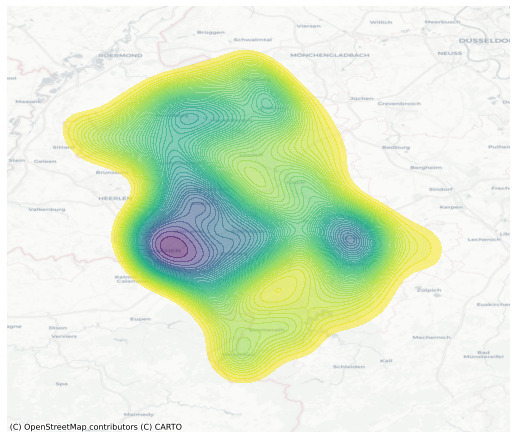

In [11]:
f, ax = plt.subplots(1, figsize=(9, 9))
#Generating the kde plot
seaborn.kdeplot(
    x = avv_halt['longitude'],
    y = avv_halt['latitude'], 
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
#Adding a basemap
contextily.add_basemap(
    ax,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron,
    
)
ax.set_axis_off()

### Exercise
Look at the point analysis again carefully and note which steps are taken here and why. Describe what happens whereby adding notes '#' in the code. If you are working with code, it is important that you understand the steps. Change the code and see what happens. Load the file 'nodes-forest_ac.geojson' and use the same algorithm but use different layout information.